## 05 衡量回归算法的标准，MSE vs MAE

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


### 波士顿房产数据

In [15]:
# 波士顿数据集已经失效，建议i自己下载
# https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data
# boston = datasets.load_boston()

import pandas as pd
boston = pd.read_csv('D:/ware/datasets/boston_house_prices.csv')

# 注意，windows拷贝过来的路径是反斜杠，这里用斜杠才生效

In [16]:
boston.keys()

Index(['506', '13', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [ ]:
print(boston.DESCR)

In [ ]:
boston.feature_names

In [ ]:
x = boston.data[:,5] # 只使用房间数量这个特征

In [7]:
x.shape

(506,)

In [8]:
y = boston.target

In [9]:
y.shape

(506,)

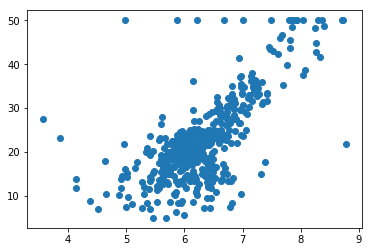

In [10]:
plt.scatter(x, y)
plt.show()

In [11]:
np.max(y)

50.0

In [12]:
x = x[y < 50.0]
y = y[y < 50.0]

In [13]:
x.shape

(490,)

In [14]:
y.shape

(490,)

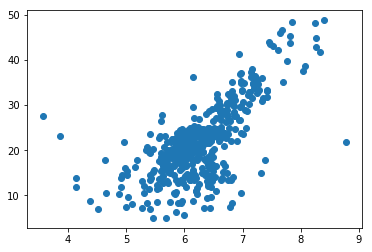

In [15]:
plt.scatter(x, y)
plt.show()

### 使用简单线性回归法

In [16]:
from playML.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [17]:
x_train.shape

(392,)

In [18]:
y_train.shape

(392,)

In [19]:
x_test.shape

(98,)

In [20]:
y_test.shape

(98,)

In [21]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [22]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [23]:
reg.a_

7.8608543562689555

In [24]:
reg.b_

-27.459342806705543

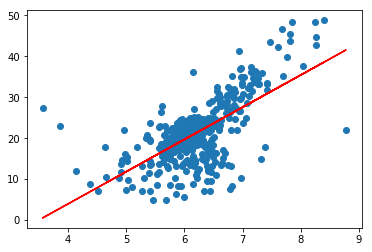

In [25]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

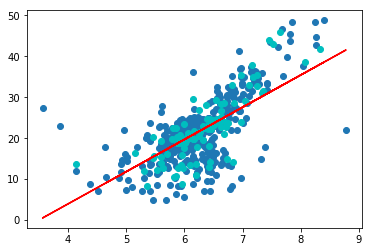

In [26]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="c")
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [27]:
y_predict = reg.predict(x_test)

### MSE

In [28]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.156602134387438

### RMSE

In [29]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

### MAE

In [30]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test

3.5430974409463873

### 封装我们自己的评测函数

代码参见 [这里](playML/metrics.py)

In [31]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [32]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [33]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [34]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### scikit-learn中的MSE和MAE

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [36]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [37]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### MSE v.s. MAE